In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
temp_dataset = pd.read_csv('temperatures.csv')


In [5]:
temp_dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [6]:
temp_dataset.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [7]:
temp_dataset.shape

(117, 18)

In [8]:
temp_dataset.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [9]:
temp_dataset.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [10]:
temp_dataset.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

In [11]:
# Split the dataset into training and testing

# Highly correlated 

X=temp_dataset[["YEAR"]]
Y=temp_dataset["DEC"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)


lr = LinearRegression()

# fit the model 
lr.fit(X_train, Y_train)

#predicting the target values
Y_test_lr = lr.predict(X_test)
Y_train_lr = lr.predict(X_train)

(93, 1) (24, 1)


#visulaize annaul temperature
plt.plot(X,y)
plt.xlabel("Year")  
plt.ylabel("Temperature") 
plt.title("Annual Temperature from 1901-2017")
plt.show()

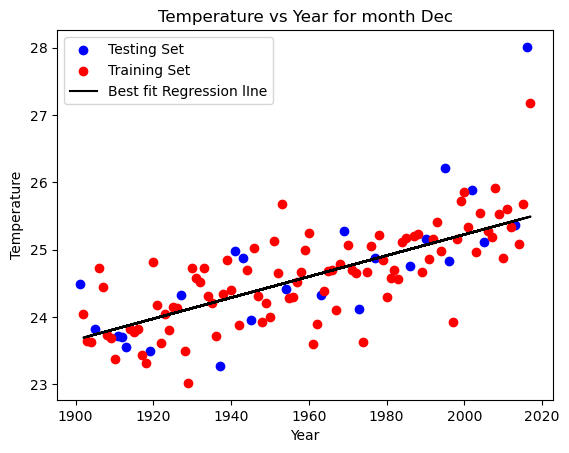

In [12]:
# Visualization
plt.scatter(X_test,Y_test,color = 'blue');
plt.scatter(X_train,Y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Testing Set','Training Set','Best fit Regression lIne'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature vs Year for month Dec')
plt.show();

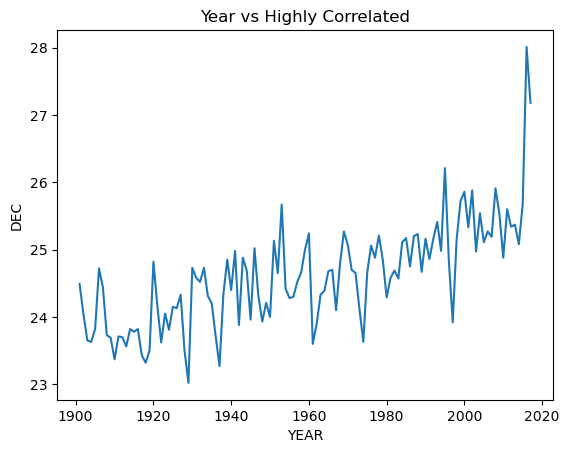

In [13]:
plt.plot(temp_dataset["YEAR"],temp_dataset["DEC"])
plt.xlabel("YEAR")
plt.ylabel("DEC")
plt.title("Year vs Highly Correlated")
plt.show()


In [14]:
# Split the dataset into training and testing
# Least correlated 
x=temp_dataset[["YEAR"]]
y=temp_dataset["JUN"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape)


lr = LinearRegression()
# fit the model 
lr.fit(x_train, y_train)

#predicting the target value 
y_test_lr = lr.predict(x_test)
y_train_lr = lr.predict(x_train)

(93, 1) (24, 1)


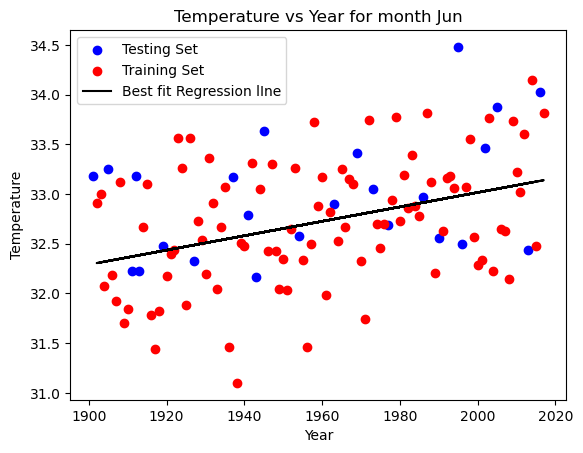

In [15]:
# Visualization
plt.scatter(x_test,y_test,color = 'blue');
plt.scatter(x_train,y_train,color = 'red');
plt.plot(x_train,lr.predict(x_train), color = 'black');
plt.legend(['Testing Set','Training Set','Best fit Regression lIne'])
plt.title('Temperature vs Year for month Jun')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show();

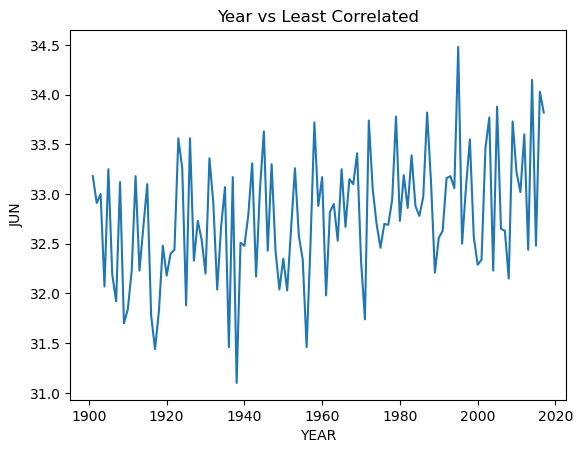

In [16]:
plt.plot(temp_dataset["YEAR"],temp_dataset["JUN"])
plt.xlabel("YEAR")
plt.ylabel("JUN")
plt.title("Year vs Least Correlated")
plt.show()

In [17]:
# Highly correalted
print('Highly correalted ') 
print('  ')
#Errors  for testing
print('Errors  for testing ') 
print('R-Squared Error :',r2_score(Y_test,Y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_test_lr))
print('Mean Squared Error :',mean_squared_error(Y_test,Y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(Y_test,Y_test_lr)))
print('  ')

#Errors  for training
print('Errors  for training ') 
print('R-Squared Error :',r2_score(Y_train,Y_train_lr))
print('Mean Absolute Error :',mean_absolute_error(Y_train,Y_train_lr))
print('Mean Squared Error :',mean_squared_error(Y_train,Y_train_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(Y_train,Y_train_lr)))
print('  ')

#least correalted
print('Least correalted ') 
print('  ')
#Errors  for testing
print('Errors  for testing ') 
print('R-Squared Error :',r2_score(y_test,y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_test_lr))
print('Mean Squared Error :',mean_squared_error(y_test,y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_lr)))
print('  ')

#Errors  for training
print('Errors  for training ') 
print('R-Squared Error :',r2_score(y_train,y_train_lr))
print('Mean Absolute Error :',mean_absolute_error(y_train,y_train_lr))
print('Mean Squared Error :',mean_squared_error(y_train,y_train_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_train,y_train_lr)))
print('  ')





Highly correalted 
  
Errors  for testing 
R-Squared Error : 0.5170575940645485
Mean Absolute Error : 0.4814995951587678
Mean Squared Error : 0.49825939386703366
Root Mean Squared Error : 0.7058749137538701
  
Errors  for training 
R-Squared Error : 0.538254678023143
Mean Absolute Error : 0.35456898080983573
Mean Squared Error : 0.22886173848942998
Root Mean Squared Error : 0.4783949607692685
  
Least correalted 
  
Errors  for testing 
R-Squared Error : -0.069129782274018
Mean Absolute Error : 0.49514306129104274
Mean Squared Error : 0.38456134236372935
Root Mean Squared Error : 0.6201301011592079
  
Errors  for training 
R-Squared Error : 0.14600066895689634
Mean Absolute Error : 0.47614631895109416
Mean Squared Error : 0.3356509640397002
Root Mean Squared Error : 0.5793539194997305
  


In [20]:
# 10% - 90%
train_sse = []
test_sse =[]
XX = temp_dataset.iloc[:,0:1]
YY = temp_dataset.iloc[:,13:14]

In [23]:
for i in range(1,10):
    p=i*0.1
    x_train,x_test,y_train,y_test = train_test_split(XX,YY,test_size=p,random_state=2)
    # Train Model
    model = LinearRegression()
    model = model.fit(x_train,y_train)
    # Training Error
    y_train = np.array(y_train)
    y_train_pred = model.predict(x_train)
    sse = [(y_train_pred[i]-y_train[i]) ** 2 for i in range(len(y_train))]
    p = sum(sse)
    train_sse.append(p)
    # Test Error
    y_test = np.array(y_test)
    y_test_pred = model.predict(x_test)
    sse = [(y_test_pred[i]-y_test[i]) ** 2 for i in range(len(y_test))]
    q = sum(sse)
    test_sse.append(q)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (408583324.py, line 10)

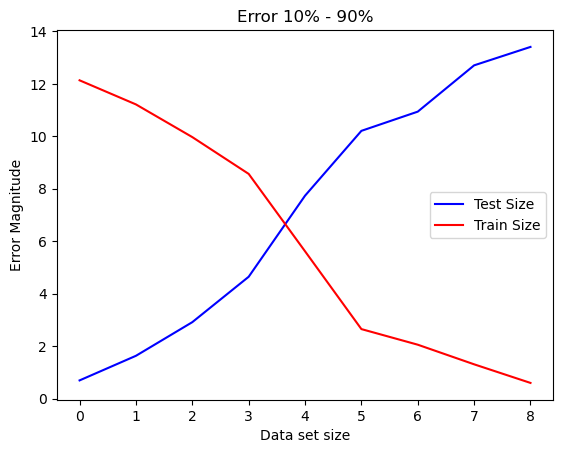

In [154]:
plt.plot(test_sse,'b')
plt.plot(train_sse,'r')
plt.title("Error 10% - 90%")
plt.xlabel("Data set size")
plt.ylabel("Error Magnitude")
plt.legend(["Test Size","Train Size"])
plt.show()